# <span style = "color:green"> Text-Based Emotion Detection</span>

***

Emotion detection (ED) is a brach of sentiment analysis that deals with the extraction and analysis of emotions. The evolution of web 2.0 has put text mining and analysis at the frontiers of organizational success. It helps service provider provide tailor-made services to their customers. Numerous studies are being carried out in the area of text mining and analysis due to the ease in sourcing for data and the vast benefits its deliverable offers.

### Content

There are two columns
* Text
* Emotion

The emotions column has various categories ranging from happiness to sadness to love and fear.

## Let's Begin

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk


### Read 'Emotion_final.csv' and store it in a dataframe variable

In [2]:
df=pd.read_csv('Emotion_final.csv')

### View head

In [3]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### Print some of the texts

In [5]:
for i in range(10):
    print(df['Text'][i])

i didnt feel humiliated
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
im grabbing a minute to post i feel greedy wrong
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
i am feeling grouchy
ive been feeling a little burdened lately wasnt sure why that was
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
i feel as confused about life as a teenager or as jaded as a year old man
i have been with petronas for years i feel that petronas has performed well and made a huge profit
i feel romantic too


### Check unique values in Emotion

In [6]:
df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

### View info of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


### Check for null values, Remove if any

In [8]:
df.isna().sum()

Text       0
Emotion    0
dtype: int64

### Check for duplicates, Remove if any

In [9]:
df.duplicated().sum()

np.int64(3)

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

### Print some of the happy text

In [20]:
happy=df[df['Emotion']=='happy']
happy['Text'].head(10)

8     i have been with petronas for years i feel tha...
11    i do feel that running is a divine experience ...
14    i have immense sympathy with the general point...
15      i do not feel reassured anxiety is on each side
22      i have the feeling she was amused and delighted
23    i was able to help chai lifeline with your sup...
29    i feel more superior dead chicken or grieving ...
30    i get giddy over feeling elegant in a perfectl...
34    i can t imagine a real life scenario where i w...
35    i am not sure what would make me feel content ...
Name: Text, dtype: object

### Print some of the sadness texts

In [21]:
sad=df[df['Emotion']=='sadness']
sad['Text'].head(10)

0                               i didnt feel humiliated
1     i can go from feeling so hopeless to so damned...
5     ive been feeling a little burdened lately wasn...
10    i feel like i have to make the suffering i m s...
13                   i feel low energy i m just thirsty
16                 i didnt really feel that embarrassed
17              i feel pretty pathetic most of the time
18    i started feeling sentimental about dolls i ha...
25    i still love my so and wish the best for him i...
26    i feel so inhibited in someone elses kitchen l...
Name: Text, dtype: object

### Print some of the surpise texts

In [22]:
surprise=df[df['Emotion']=='surprise']
surprise['Text'].head(10)

6      ive been taking or milligrams or times recomme...
32     i have seen heard and read over the past coupl...
57     i keep feeling pleasantly surprised at his sup...
64     i am now nearly finished the week detox and i ...
129    i too feel as if i am a stranger in a strange ...
145    i started feeling funny and then friday i woke...
156    im certainly not going to sit and tell you wha...
157    im sorry that there wasnt more humor in this p...
168    i want to hold this feeling of shocked awe and...
181    i will enclose her verses on her could not wei...
Name: Text, dtype: object

### Plot a countplot of Emotions

C:\Users\AnjanaK\AppData\Local\Temp\ipykernel_18216\2156650085.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Emotion',data=df,palette='rainbow')


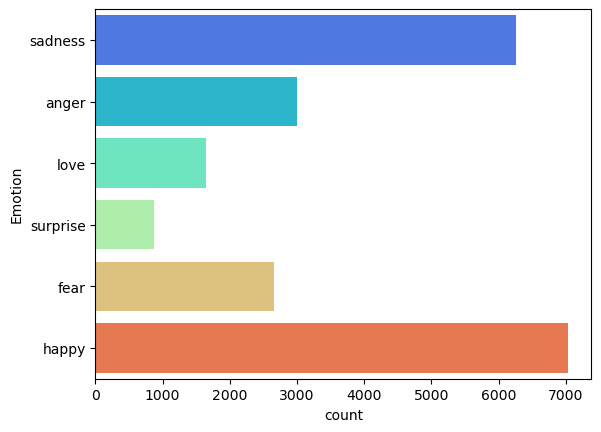

In [13]:
sns.countplot(y='Emotion',data=df,palette='rainbow')
plt.show()

### Convert Emotions column to numerical values using Label encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
df['Emotion']=le.fit_transform(df['Emotion'])

In [25]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


### Store the classes in a list
* use le.classes_ to fetch the classes

In [27]:
list=le.classes_

In [28]:
list

array(['anger', 'fear', 'happy', 'love', 'sadness', 'surprise'],
      dtype=object)

### Import WordNetLemmatizer, stopwords

In [29]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

### Create a function to preprocess the text (lemmatize,lower,remove stopwords, remove special characters)

In [30]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    word = ' '.join(word)
    return word

### Apply the function to Text in our dataframe

In [31]:
df['Text']=df['Text'].apply(preprocess)
df.head()

,Text,Emotion
0,didnt feel humiliate,4
1,go feel hopeless damn hopeful around someone c...,4
2,im grab minute post feel greedy wrong,0
3,ever feel nostalgic fireplace know still property,3
4,feel grouchy,0


### View some of the texts after preprocessing

In [32]:
for i in range(10):
    print(df['Text'][i])

didnt feel humiliate
go feel hopeless damn hopeful around someone care awake
im grab minute post feel greedy wrong
ever feel nostalgic fireplace know still property
feel grouchy
ive feel little burden lately wasnt sure
ive take milligrams time recommend amount ive fall asleep lot faster also feel like funny
feel confuse life teenager jade year old man
petronas years feel petronas perform well make huge profit
feel romantic


### Convert text to vectors

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
cv=CountVectorizer()

In [39]:
X = cv.fit_transform(df['Text']).toarray()

In [40]:
X.shape

(21456, 15604)

In [42]:
y=df['Emotion']

### Split the dataset into training and Testing set

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Create a Random forest classifier model

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model=RandomForestClassifier(n_estimators=50)

### Train the model

In [47]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

### Check the score of the model

In [48]:
model.score(X_train,y_train)

0.9985351887609029

### Make predictions with X_test

In [49]:
pred=model.predict(X_test)

### Check the accuracy of our prediction

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
print('Accuracy score is:',accuracy_score(y_test,pred))

Accuracy score is: 0.8617368339288488


### Create confusion matrix

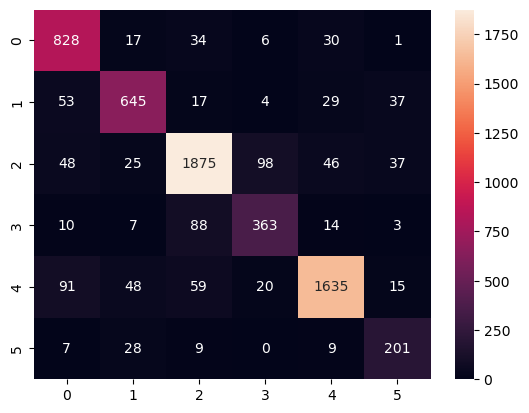

In [52]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')
plt.show()

### Create classification report

In [53]:
print('Classification report:',classification_report(y_test,pred))

Classification report:               precision    recall  f1-score   support

           0       0.80      0.90      0.85       916
           1       0.84      0.82      0.83       785
           2       0.90      0.88      0.89      2129
           3       0.74      0.75      0.74       485
           4       0.93      0.88      0.90      1868
           5       0.68      0.79      0.73       254

    accuracy                           0.86      6437
   macro avg       0.81      0.84      0.82      6437
weighted avg       0.87      0.86      0.86      6437



***

# <center><a href = "http://edure.in/"><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></a></center>